In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import matplotlib.patches as mpatches
from matplotlib.path import Path

In [6]:
# variables
path_excel = r'data.xlsx'
sheetname = 'component_fsm'
dpi = 700
file_path = r'images/Figure3 fsm_component_compare.pdf'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

title = 'The comparison for each component of fecal sludge management at the CACTUS database'
xlabel = 'CACTUS Component (n). * (n) presents the number of components in CACTUS database'
ylabel = 'Total Annualised Cost per Household\n(TACH) Int$ (2020)'

<function matplotlib.pyplot.show(close=None, block=None)>

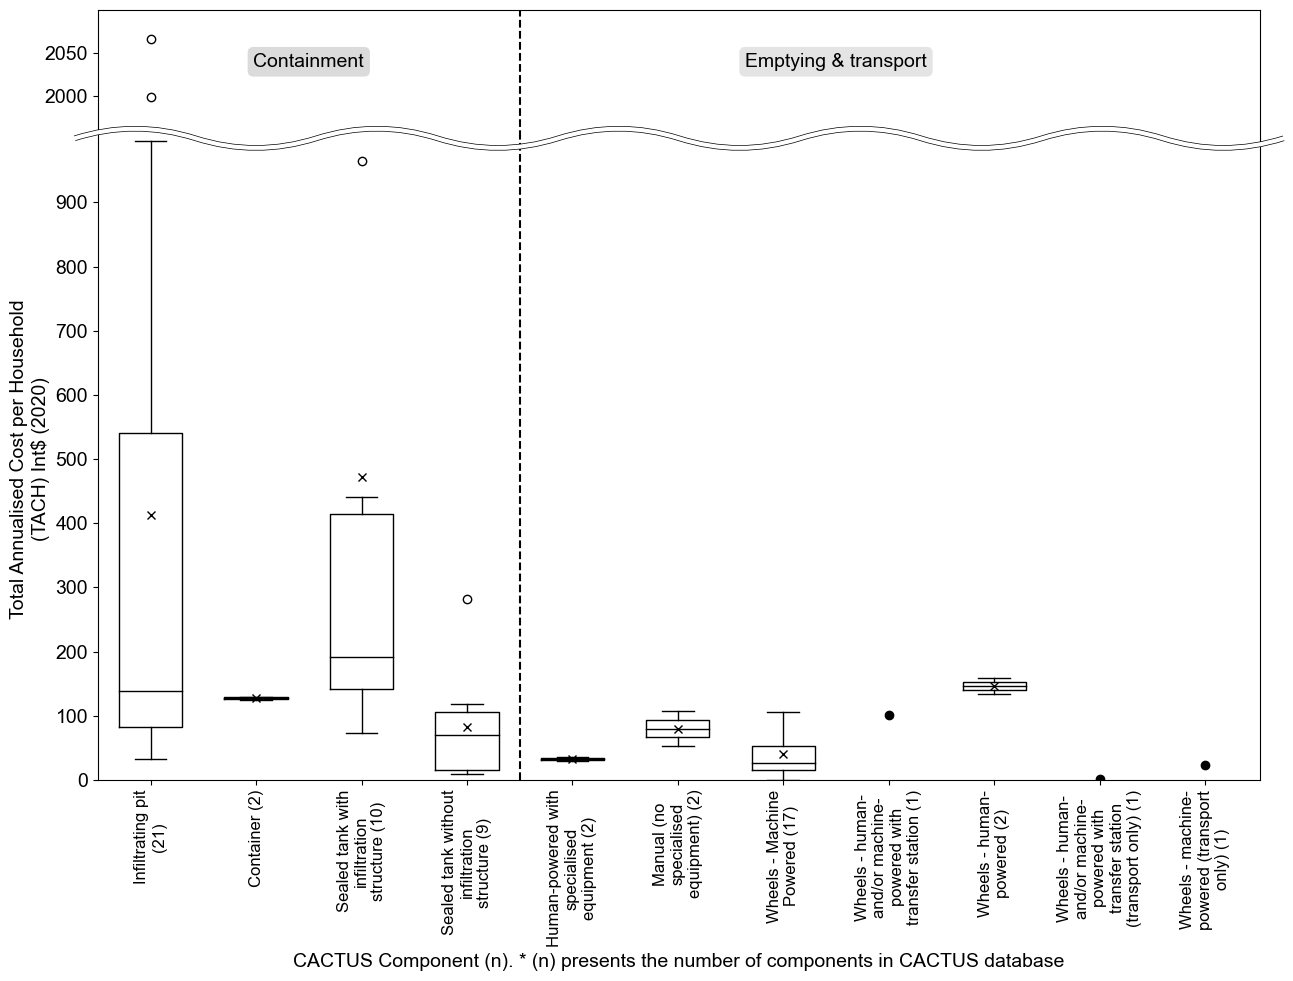

In [7]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 10), sharex='col', gridspec_kw={'height_ratios': (0.2,1)} )

fig.patch.set_facecolor('white') # 背景色を「白」に設定

df = pd.read_excel(path_excel, sheet_name=sheetname)

groups = df.groupby('component', sort=False)
group_labels = [f"{label} ({size})" for label, size in groups.size().items()]

for index, ax in enumerate(axs):
    for j, group in enumerate(groups):
        tach = group[1]['tach']
        size = len(tach)
        position = j + 1
        
        if size == 1:
            ax.plot(position, tach, marker='o', color='k', markersize=6)
        else:
            bp = ax.boxplot(
                tach, 
                positions=[position],
                showmeans=True, 
                meanprops = {'marker': 'x', 'markerfacecolor': 'k', 'markeredgecolor':'k', 'markersize': 6},
                widths=0.6
            )

            # make median line black
            for median in bp['medians']:
                median.set_color('black')
    
    ax.axvline(x=4.5, color='k', linestyle='--')

fig.subplots_adjust(hspace=0.0)
        
# 下段サブプロット
axs[1].set_ylim(0,1000)
axs[1].set_yticks(np.arange(0,1000,100))
xtick_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in group_labels ]
axs[1].set_xticks(np.arange(len(xtick_labels)) + 1)
axs[1].set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

# 上段サブプロット
axs[0].set_ylim(1950,2100) 
axs[0].set_yticks(np.arange(2000,2100,50))

# 下段のプロット領域上辺を非表示
axs[1].spines['top'].set_visible(False)

# 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 

## ニョロ線の描画
d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=axs[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=axs[1].transAxes, zorder=10,
                           capstyle='round')

a = axs[1].add_patch(line1)
a = axs[1].add_patch(line2)

axs[1].set_ylabel(ylabel, fontsize=14)
axs[1].set_xlabel(xlabel, fontsize=14)

axs[0].text(2.5, 2050, 'Containment', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))
axs[0].text(7.5, 2050, 'Emptying & transport', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6, boxstyle='round'))


plt.savefig(file_path, format="pdf", dpi=dpi, transparent=True, bbox_inches='tight')
plt.savefig(f"{file_path}.png", format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show